 Build a machine learning model to predict salary based on position for
a given dataset


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.shape

(10, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Data cleaning

In [7]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
#split data into dependent and independent variable
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:].values

In [9]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [10]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

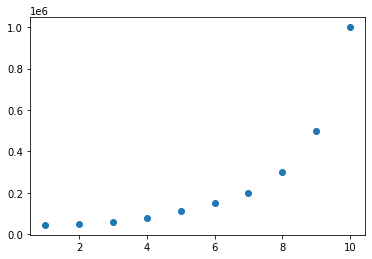

In [11]:
plt.scatter(x,y)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y)

## Build  LinearRegression model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(x,y)

LinearRegression()

In [17]:
y_pred_using_linear_model=lr.predict(x)

## Performance matrix

In [18]:
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
R2_score=r2_score(y,y_pred_using_linear_model)

In [20]:
R2_score

0.6690412331929894

In [21]:
Mean_Squared_Error=mean_squared_error(y,y_pred_using_linear_model)
Mean_Squared_Error

0.3309587668070105

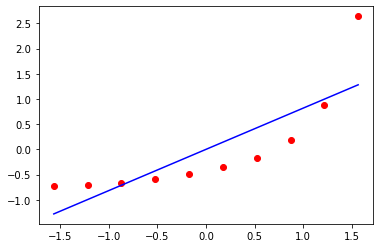

In [22]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred_using_linear_model,color="blue")
plt.show()

## Build Polynomial Regression model

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_re=PolynomialFeatures(degree=5)
poly_x=poly_re.fit_transform(x)

In [25]:
lr.fit(poly_x,y)

LinearRegression()

In [26]:
y_pred_using_polynomial_regression=lr.predict(poly_x)

## Performance matrix

In [27]:
r2=r2_score(y,y_pred_using_polynomial_regression)
r2

0.9997969027099755

In [28]:
Mean_Squared_Error=mean_squared_error(y,y_pred_using_polynomial_regression)
Mean_Squared_Error

0.00020309729002456912

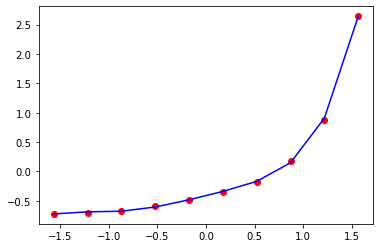

In [29]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred_using_polynomial_regression,color="blue")
plt.show()